# ESERCIZIO 1
(Per approfondimenti vedere Butcher [p 58])

Implementare Eulero Esplicito con passo variabile. 

La scelta del passo è basata sulla stima dell'errore di un passo del metodo. Per calcolare questa stima si può utilizzare il metodo dei Trapezi, più accurato di Eulero Esplicito, cioè si può approssimare:
$$err_n = y(t_n) - u_n^{EE} \approx u_n^{TR} - u_n^{EE} $$

Dove 
$$ u_n^{TR} = u_{n-1}^{EE} - \frac{h}{2} \big( f(u_{n-1}^{EE}) + f(u_n^{EE})  \big) $$

Il passo dovrà essere diminuito nel caso in cui questa stima sia maggiore di un valore di tolleranza imposto a priori, chiamiamolo `tol`.
Dovrà essere aumentato in modo proporzionale al suo valore in caso contrario.



> Questo è un esempio semplice del modo in cui viene effettuato il controllo del passo e di come viene stimato l'errore ad ogni step.
> Tuttavia metodi più accurati sono il "Milne Device" che utilizza due metodi dello stesso ordine per calcolare una stima dell'errore e, per i metodi Runge-Kutta, il confronto tra due metodi di ordine diverso (questo spiega i nomi "RK23" e "RK45" del metodo solve_ivp).






Completare il codice sottostante ed aggiungere i grafici.


Mostrare un confronto in cui si veda che con passo variabile possiamo ottenere soluzioni migliori con meno iterazioni: confrontare l'errore dato dalla norma2 (`np.linalg.norm`) della differenza tra soluzione vera e numerica, calcolate negli stessi istanti.


In [1]:
## import delle Librerie
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Problema TEST e Soluzione analitica:
k = 50.0;
func_test = lambda y: -k *y;
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))

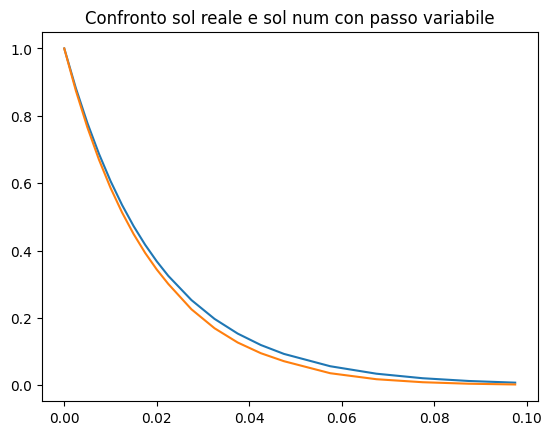

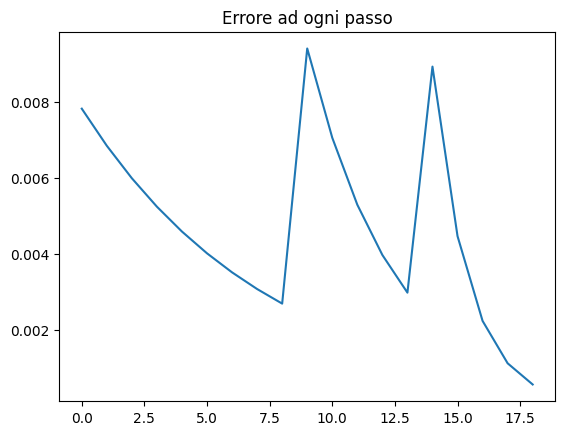

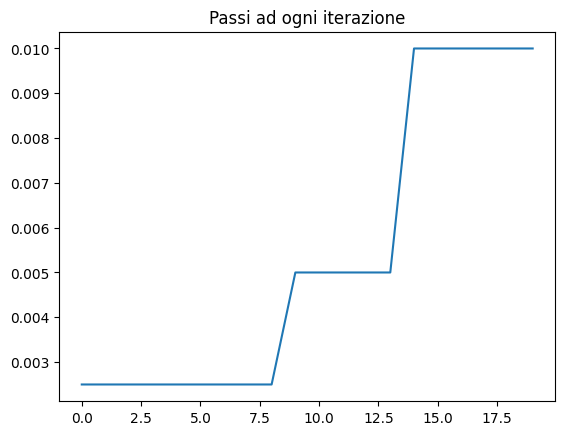

In [3]:
# Metodo di Eulero Esplicito o "in avanti" (EE) con passo variabile

tf = 0.1;
N = 20;                           # numero passi(che avranno lunghezze variabili) che si vogliono simulare
u_EE  = np.zeros(N);              # array che conterra' la soluzione
err  = np.zeros(N-1);             # array che conterra' l'errore stimato ad ogni passo
h  = np.zeros(N);                 # array che conterra' la lunghezza di ciascun passo
times = np.zeros(N);              # array che conterra' i tempi a cui viene calcolata la soluzione
u_n   = 1.0;                      # punto iniziale
u_EE[0] = u_n;
h0 = 0.01;                        # passo iniziale
h[0] = h0 ;
tol  = 0.01;                      # tolleranza

i = 0;                            # iterazione
f_un = func_test(u_n);            # funzione nel punto iniziale
while i < N-1:
    u_n1      = u_n + h[i]* f_un;
    f_un1 = func_test(u_n1);
    
    # stima del punto 
    u_n1_TR = u_n + 0.5* h[i]*( f_un + f_un1) ;
    
    # stima dell'errore del passo "errore locale di troncamento"
    err[i] = np.linalg.norm(u_n1_TR - u_n1);
    
    if err[i] < tol:
        ''' 
        Siamo nel caso in cui l'errore è minore della tolleranza, 
        quindi il passo è e possiamo 
        - salvare la soluzione attuale u_n1 nel vettore u_EE
        - aggiornare u_n e f_un
        - calcolare il nuovo step h[i+1] (in questo esempio semplice lo aumentiamo in modo costante)
        - salvare l'istante t_{n+1} nel vettore times
        - aggiornare il valore dell'iteratore "i"
        '''
        u_EE[i+1] = u_n1
        u_n = u_n1
        f_un = f_un1
        h[i+1] = h0
        times[i+1] = times[i] + h[i]
        i =i+1;    # passiamo al passo successivo
    else:
        ''' 
        STEP DA RIFARE perche' l'errore stimato e' troppo grande.
        Dimezzare il passo attuale e ricalcolare lo stesso step, senza aggiornare l'iteratore "i"
        '''
        h[i] = h[i]/2
        # h0 = h[i]
#end


'''
Fare i grafici di
- confronto tra soluzione vera e numerica
- errore ad ogni passo
- lunghezza del passo scelto
'''
y_real = sol_real(1, 0, times)
plt.figure(1)
plt.title('Confronto sol reale e sol num con passo variabile')
plt.plot(times, y_real)
plt.plot(times, u_EE)
plt.figure(2)
plt.title('Errore ad ogni passo')
plt.plot(err)
plt.figure(3)
plt.title('Passi ad ogni iterazione')
plt.plot(h)
plt.show()


# ESERCIZIO 2:

Confrontare i vari metodi sullo stesso esempio e mostrare l'importanza del passo adattativo.

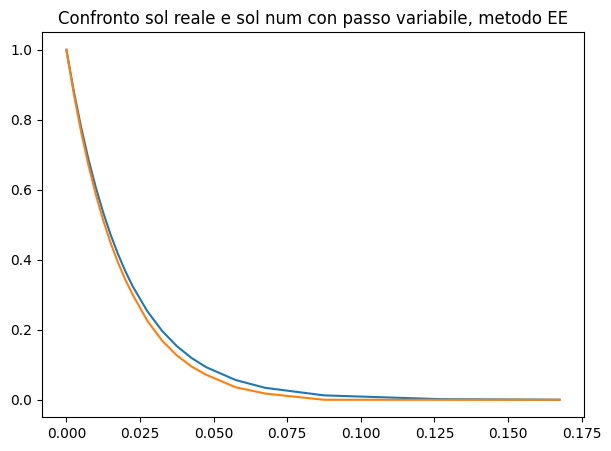

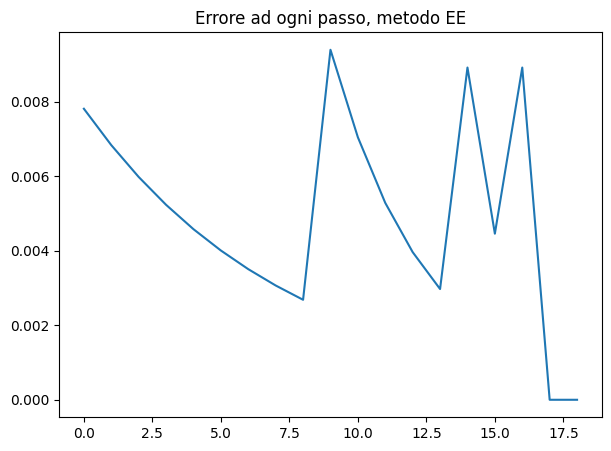

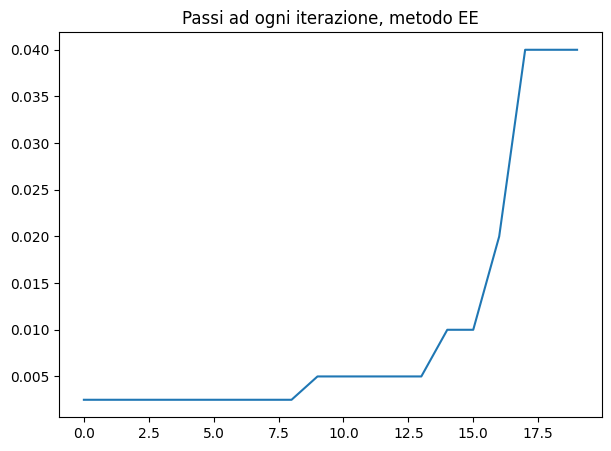

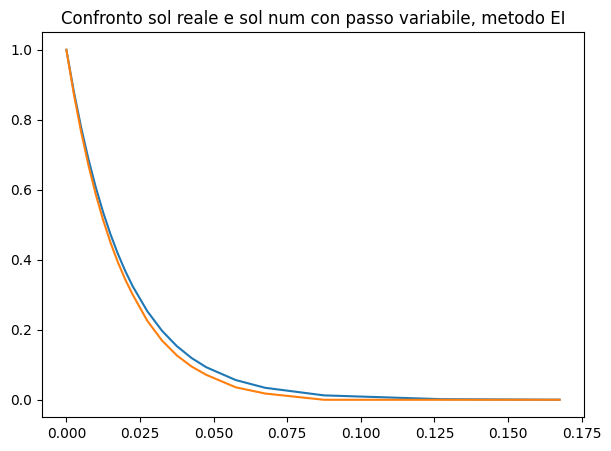

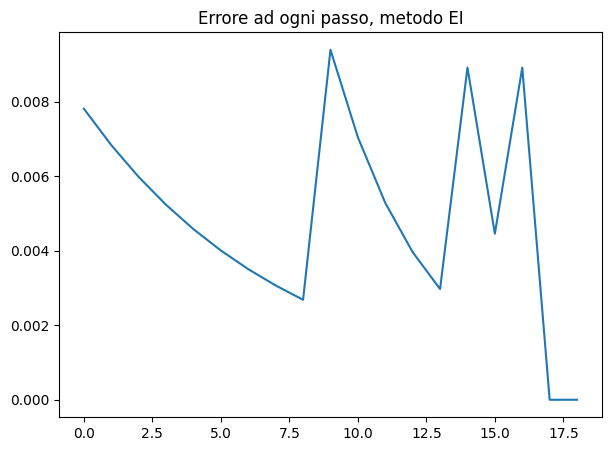

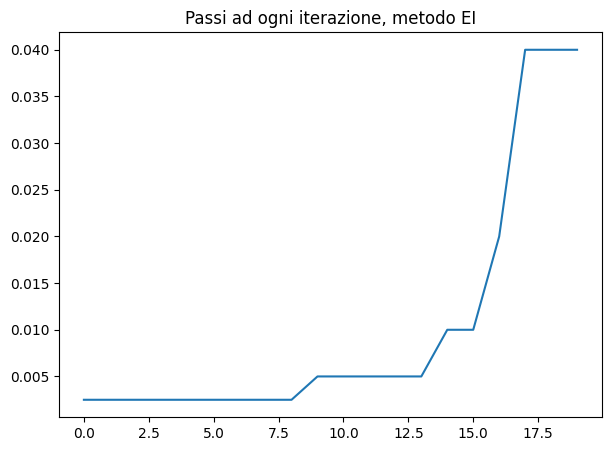

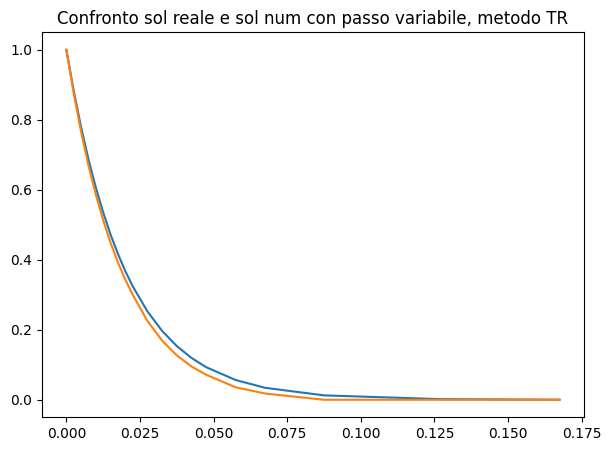

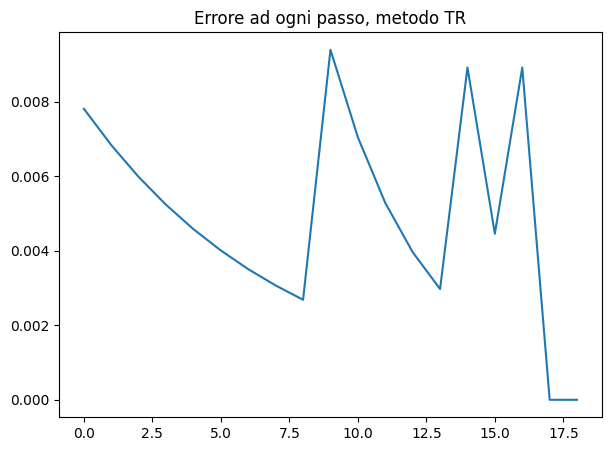

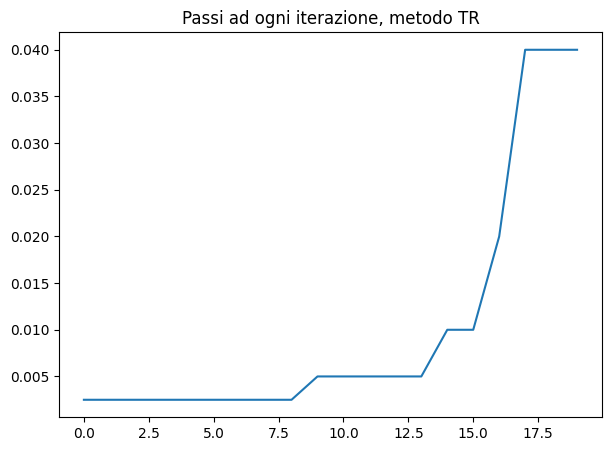

In [4]:
# Problema TEST
k = 50.0;
func_test = lambda y: -k *y;
sol_real = lambda y0,t0,t: y0*np.exp(-k*(t-t0))


tf = 0.1;
N = 20;                           # numero passi(che avranno lunghezze variabili) che si vogliono simulare
u  = np.zeros(N);                 # array che conterra' la soluzione
err  = np.zeros(N-1);             # array che conterra' l'errore stimato ad ogni passo

h  = np.zeros(N);                 # array che conterra' la lunghezza di ciascun passo
times = np.zeros(N);              # array che conterra' i tempi a cui viene calcolata la soluzione
u_n   = 1.0;                      # punto iniziale
u[0] = u_n;
h0 = 0.04;                        # passo iniziale
h[0] = h0 ;
tol  = 0.01;                      # tolleranza

i = 0;                            # iterazione
f_un = func_test(u_n);            # funzione nel punto iniziale
for metodo in ['EE','EI','TR']:
    while i < N-1:
        if metodo == 'EE':
            u_n1 = u_n + h[i]* f_un

        elif metodo == 'EI':
            u_n1 = optimize.newton(lambda u_n1 :  u_n1 - h[i]*func_test(u_n1) - u_n, u_n)

        else:
            u_n1  = optimize.newton(lambda u_n1 :  u_n1 - h[i]*0.5*(func_test(u_n1) + func_test(u_n)) - u_n, u_n);

        f_un1 = func_test(u_n1)
        
        # stima del punto 
        u_n1_TR = u_n + 0.5* h[i]*( f_un + f_un1) 
        
        # stima dell'errore del passo "errore locale di troncamento"
        err[i] = np.linalg.norm(u_n1_TR - u_n1)
        
        if err[i] < tol:
            ''' 
            Siamo nel caso in cui l'errore è minore della tolleranza, 
            quindi il passo è e possiamo 
            - salvare la soluzione attuale u_n1 nel vettore u_EE
            - aggiornare u_n e f_un
            - calcolare il nuovo step h[i+1] (in questo esempio semplice lo aumentiamo in modo costante)
            - salvare l'istante t_{n+1} nel vettore times
            - aggiornare il valore dell'iteratore "i"
            '''
            u[i+1] = u_n1
            u_n = u_n1
            f_un = f_un1
            h[i+1] = h0
            times[i+1] = times[i] + h[i]
            i =i+1;    # passiamo al passo successivo
        else:
            ''' 
            STEP DA RIFARE perche' l'errore stimato e' troppo grande.
            Dimezzare il passo attuale e ricalcolare lo stesso step, senza aggiornare l'iteratore "i"
            '''
            h[i] = h[i]/2
            # h0 = h[i]

    '''
    Fare i grafici di
    - confronto tra soluzione vera e numerica
    - errore ad ogni passo
    - lunghezza del passo scelto
    '''
    y_real = sol_real(1, 0, times)
    plt.figure(1,figsize=(7,5))
    plt.title('Confronto sol reale e sol num con passo variabile, metodo %s' %metodo)
    plt.plot(times, y_real)
    plt.plot(times, u)
    plt.figure(2,figsize=(7,5))
    plt.title('Errore ad ogni passo, metodo %s' %metodo)
    plt.plot(err)
    plt.figure(3,figsize=(7,5))
    plt.title('Passi ad ogni iterazione, metodo %s' %metodo)
    plt.plot(h)
    plt.show()